#### In this assignment, I going to extract data from twitter on the 3 presidential candidates (Peter Obi, Tinubu and Atiku)use their names to search for them. With the aim of checking the candidate with the most polarity (positive tweets). 


In [6]:
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [8]:
#!pip freeze

In [61]:
!pip install jupyter_tabnine
!jupyter nbextension install --py jupyter_tabnine
!jupyter nbextension enable --py jupyter_tabnine
!jupyter serverextension enable --py jupyter_tabnine

Defaulting to user installation because normal site-packages is not writeable


Installing C:\Users\STUTERN\AppData\Roaming\Python\Python39\site-packages\jupyter_tabnine\static -> jupyter_tabnine
Making directory: C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\
Copying: C:\Users\STUTERN\AppData\Roaming\Python\Python39\site-packages\jupyter_tabnine\static\main.css -> C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\main.css
Copying: C:\Users\STUTERN\AppData\Roaming\Python\Python39\site-packages\jupyter_tabnine\static\main.js -> C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\main.js
Copying: C:\Users\STUTERN\AppData\Roaming\Python\Python39\site-packages\jupyter_tabnine\static\README.md -> C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\README.md
Copying: C:\Users\STUTERN\AppData\Roaming\Python\Python39\site-packages\jupyter_tabnine\static\tabnine.yaml -> C:\ProgramData\jupyter\nbextensions\jupyter_tabnine\tabnine.yaml
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupy

In [27]:
# pip install textblob

In [8]:
pip install wor

In [16]:
import twint
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import glob
import os
from datetime import datetime
# import nest_asyncio
from textblob import TextBlob
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from sqlalchemy import create_engine
from wordcloud import WordCloud
import nest_asyncio
nest_asyncio.apply()

In [17]:
# creating a search string 
candidates={"Bola Ahmed Tinubu": "Asiwaju\Tinubu\Jagaban", 
           "Peter Obi": "PO\Peter Obi\ObiDatti", 
           "Atiku": "Atiku"}

In [18]:
def twintConfig(search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Limit=500
    c.Lang = 'en'
    c.Pandas = True
    c.Pandas_au = True          
    c.Pandas_clean=True
    c.Since='2022-01-01'
    c.Until='2022-11-08'
    twint.run.Search(c)

In [21]:
def Run_Twint(search_vals):
    
    #set empty dataframe for join
    out_df= pd.DataFrame()
    
    for candidates in search_vals.items():
        print ("running for search item: "+candidates[0]+"\n")
        print ("Search string: "+candidates[1]+"\n")
        
        #run twint
        twintConfig(candidates)
        
        #get dataframe
        candidates_2023 = twint.storage.panda.Tweets_df
        
        #join Dataframes and create 'candidates' column
        candidates_2023["candidates"]= candidates[0]
        out_df = pd.concat([out_df,candidates_2023])
        
    return out_df

In [26]:
# Extracting the tweets of the candidates from Jan 1st, 2022 till Nov 8th, 2022.
# candidates_2023 = Run_Twint(candidates)

In [25]:
candidates_2023

,candidates,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,Peter Obi,1589604650239791106,1589293497999556614,1.667826e+12,2022-11-07 14:04:16,+0100,,@PO_GrassRootM @PeterObi @50fils_dxb OBIDATTI ...,en,[],...,,,,,,"[{'screen_name': 'PO_GrassRootM', 'name': 'Pet...",,,,
1,Peter Obi,1589501736947167233,1589501736947167233,1.667802e+12,2022-11-07 07:15:20,+0100,,APC and PDP don’t really see each other as opp...,en,[obidatti],...,,,,,,[],,,,
2,Peter Obi,1589365234262999041,1589365234262999041,1.667769e+12,2022-11-06 22:12:55,+0100,,Just Retweet... Peter Obi PO Obidients ObiDat...,en,[peterobi],...,,,,,,[],,,,
3,Peter Obi,1589350835359662080,1589293497999556614,1.667766e+12,2022-11-06 21:15:42,+0100,,@PO_GrassRootM @PeterObi @Obidatti_Son,qam,[],...,,,,,,"[{'screen_name': 'PO_GrassRootM', 'name': 'Pet...",,,,
4,Peter Obi,1589350720708685824,1589293497999556614,1.667766e+12,2022-11-06 21:15:15,+0100,,@PO_GrassRootM @PeterObi Obidatti-Son,it,[],...,,,,,,"[{'screen_name': 'PO_GrassRootM', 'name': 'Pet...",,,,
5,Peter Obi,1588910176547278851,1588625687589842944,1.667661e+12,2022-11-05 16:04:41,+0100,,@ABROLUSOK @PremiumTimesng Yes PO can save Nig...,en,[],...,,,,,,"[{'screen_name': 'ABROLUSOK', 'name': 'Gratitu...",,,,
6,Peter Obi,1588886248357101569,1588801057433391104,1.667655e+12,2022-11-05 14:29:36,+0100,,@NnekaLE Credible people as Peter Obi win elec...,en,"[endsars, obidatti]",...,,,,,,"[{'screen_name': 'NnekaLE', 'name': 'Nneka Ada...",,,,
7,Peter Obi,1588819934351880196,1588818649292636160,1.667639e+12,2022-11-05 10:06:05,+0100,,@urchilla01 @PO_GrassRootM ❗ It's going down! ...,en,[obidatti],...,,,,,,"[{'screen_name': 'urchilla01', 'name': 'KWEKU ...",,,,
8,Peter Obi,1588471923947835392,1588471923947835392,1.667556e+12,2022-11-04 11:03:13,+0100,,Peter Obi is the light that is exposing the da...,en,[],...,,,,,,[],,,,
9,Peter Obi,1588221392021262338,1588219351290843136,1.667496e+12,2022-11-03 18:27:42,+0100,,@nwv4_ObiDatti @PO_GrassRootM @PeterObi Please...,en,[],...,,,,,,"[{'screen_name': 'PO_GrassRootM', 'name': 'Pet...",,,,


In [27]:
pd.set_option('display.max_columns', None) # used to display all the columns without hidding any

In [28]:
# checking the columns in the dataset
candidates_2023.columns

Index(['candidates', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [29]:
candidates_2023.head(3)

,candidates,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,Peter Obi,1589604650239791106,1589293497999556614,1.667826e+12,2022-11-07 14:04:16,+0100,,@PO_GrassRootM @PeterObi @50fils_dxb OBIDATTI ...,en,[],[],1.230944e+18,1230944092747706368,50fils_dxb,IGBO-MAN SUPERSTAR 💫,1.0,14,https://twitter.com/50fils_dxb/status/15896046...,[],[],0.0,,False,0.0,0.0,0.0,,PO\Peter Obi\ObiDatti,,,,,,,"[{'screen_name': 'PO_GrassRootM', 'name': 'Pet...",,,,
1,Peter Obi,1589501736947167233,1589501736947167233,1.667802e+12,2022-11-07 07:15:20,+0100,,APC and PDP don’t really see each other as opp...,en,[obidatti],[],4.753988e+08,475398821,Karigwe,Chukwunonso Bryan Ayogu (Karigwe),1.0,07,https://twitter.com/Karigwe/status/15895017369...,[],[],0.0,,False,1.0,0.0,0.0,,PO\Peter Obi\ObiDatti,,,,,,,[],,,,
2,Peter Obi,1589365234262999041,1589365234262999041,1.667769e+12,2022-11-06 22:12:55,+0100,,Just Retweet... Peter Obi PO Obidients ObiDat...,en,[peterobi],[],1.285248e+18,1285248316926820354,abijahjohnnie1,Long John The Wicked Programmer,7.0,22,https://twitter.com/abijahjohnnie1/status/1589...,[],[],0.0,,False,0.0,0.0,1.0,,PO\Peter Obi\ObiDatti,,,,,,,[],,,,


In [30]:
candidates_2023["language"].unique() # checking if my data has other languages other than English

array(['en', 'qam', 'it', 'es', 'in', 'lv'], dtype=object)

In [31]:
# Dropping other languages that are not English
candidates_2023 = candidates_2023[candidates_2023["language"].isin(['en'])]

In [32]:
candidates_2023["language"].unique() # confirming that other languages are dropped

array(['en'], dtype=object)

In [33]:
candidates_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 19
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   candidates       34 non-null     object 
 1   id               34 non-null     object 
 2   conversation_id  34 non-null     object 
 3   created_at       34 non-null     float64
 4   date             34 non-null     object 
 5   timezone         34 non-null     object 
 6   place            34 non-null     object 
 7   tweet            34 non-null     object 
 8   language         34 non-null     object 
 9   hashtags         34 non-null     object 
 10  cashtags         34 non-null     object 
 11  user_id          34 non-null     float64
 12  user_id_str      34 non-null     object 
 13  username         34 non-null     object 
 14  name             34 non-null     object 
 15  day              34 non-null     float64
 16  hour             34 non-null     object 
 17  link             3

In [34]:
candidates_2023.shape

(34, 39)

In [35]:
candidates_2023["tweet"][1]

1    APC and PDP don’t really see each other as opp...
1    @renoomokri Why is ATIKU running away from the...
Name: tweet, dtype: object

In [36]:
# checking for dupicate rows
candidates_2023.duplicated(subset = "tweet", keep = 'first').sum() # we had about 139 duplicate rows

0

In [37]:
#Dropping the duplicated rows  
candidates_2023 = candidates_2023.drop_duplicates(subset=["tweet"],keep="first")

In [38]:
candidates_2023.shape # confirming if duplicates are dropped

(34, 39)

In [39]:
def clean_your_text(text): 
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [40]:
candidates_2023["tweet"] = candidates_2023["tweet"].apply(clean_your_text)

In [41]:
candidates_2023.shape

(34, 39)

In [42]:
candidates_2023["tweet"][1]

1    apc and pdp dont really see each other as oppo...
1     why is atiku running away from the public debate
Name: tweet, dtype: object

In [43]:
print("Running sentiment process")

# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

candidates_2023["Subjectivity"] = candidates_2023['tweet'].apply(getSubjectivity)
candidates_2023["Polarity"] = candidates_2023['tweet'].apply(getPolarity)

Running sentiment process


In [44]:
candidates_2023[['Polarity','tweet']]

,Polarity,tweet
0,0.175000,obidatti is the only true way
1,0.439286,apc and pdp dont really see each other as oppo...
2,0.000000,just retweet peter obi po obidients obidatti ...
5,0.000000,yes po can save nigeria thru us if we give the...
6,0.333333,credible people as peter obi win elections not...
7,0.148148,it going down spontaneous march for peter obi ...
8,0.600000,peter obi is the light that is exposing the da...
9,0.400000,please ooooo my great obidients family surpris...
11,0.633333,please our lovely obedients kindly help us fol...
12,0.150000,tinubu never believes in one nigeria what is h...


In [45]:
candidates_2023[['Polarity','tweet']]['tweet'].iloc[0]

'obidatti is the only true way'

In [46]:
#creating a column to show if the tweet is positive, negative or neutral
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

candidates_2023['Analysis'] = candidates_2023['Polarity'].apply(analysis)

In [47]:
candidates_2023[['Polarity','tweet','Analysis', 'search']]

,Polarity,tweet,Analysis,search
0,0.175000,obidatti is the only true way,Positive,PO\Peter Obi\ObiDatti
1,0.439286,apc and pdp dont really see each other as oppo...,Positive,PO\Peter Obi\ObiDatti
2,0.000000,just retweet peter obi po obidients obidatti ...,Neutral,PO\Peter Obi\ObiDatti
5,0.000000,yes po can save nigeria thru us if we give the...,Neutral,PO\Peter Obi\ObiDatti
6,0.333333,credible people as peter obi win elections not...,Positive,PO\Peter Obi\ObiDatti
7,0.148148,it going down spontaneous march for peter obi ...,Positive,PO\Peter Obi\ObiDatti
8,0.600000,peter obi is the light that is exposing the da...,Positive,PO\Peter Obi\ObiDatti
9,0.400000,please ooooo my great obidients family surpris...,Positive,PO\Peter Obi\ObiDatti
11,0.633333,please our lovely obedients kindly help us fol...,Positive,PO\Peter Obi\ObiDatti
12,0.150000,tinubu never believes in one nigeria what is h...,Positive,PO\Peter Obi\ObiDatti


In [48]:
candidates_2023["date"] = pd.to_datetime(candidates_2023["date"])

In [49]:
candidates_2023.head(3)

,candidates,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Subjectivity,Polarity,Analysis
0,Peter Obi,1589604650239791106,1589293497999556614,1.667826e+12,2022-11-07 14:04:16,+0100,,obidatti is the only true way,en,[],[],1.230944e+18,1230944092747706368,50fils_dxb,IGBO-MAN SUPERSTAR 💫,1.0,14,https://twitter.com/50fils_dxb/status/15896046...,[],[],0.0,,False,0.0,0.0,0.0,,PO\Peter Obi\ObiDatti,,,,,,,"[{'screen_name': 'PO_GrassRootM', 'name': 'Pet...",,,,,0.825000,0.175000,Positive
1,Peter Obi,1589501736947167233,1589501736947167233,1.667802e+12,2022-11-07 07:15:20,+0100,,apc and pdp dont really see each other as oppo...,en,[obidatti],[],4.753988e+08,475398821,Karigwe,Chukwunonso Bryan Ayogu (Karigwe),1.0,07,https://twitter.com/Karigwe/status/15895017369...,[],[],0.0,,False,1.0,0.0,0.0,,PO\Peter Obi\ObiDatti,,,,,,,[],,,,,0.480556,0.439286,Positive
2,Peter Obi,1589365234262999041,1589365234262999041,1.667769e+12,2022-11-06 22:12:55,+0100,,just retweet peter obi po obidients obidatti ...,en,[peterobi],[],1.285248e+18,1285248316926820354,abijahjohnnie1,Long John The Wicked Programmer,7.0,22,https://twitter.com/abijahjohnnie1/status/1589...,[],[],0.0,,False,0.0,0.0,1.0,,PO\Peter Obi\ObiDatti,,,,,,,[],,,,,0.000000,0.000000,Neutral


In [50]:
# first get the mean of the candidates
candidates_2023.groupby(['search']).mean()

,created_at,user_id,day,video,nlikes,nreplies,nretweets,Subjectivity,Polarity
search,,,,,,,,,
Atiku,1.667865e+12,7.258400e+17,2.0000,0.111111,1.166667,0.388889,0.888889,0.287751,0.076918
PO\Peter Obi\ObiDatti,1.667555e+12,1.058640e+18,3.9375,0.125000,9.000000,0.062500,3.500000,0.394535,0.226224


In [51]:
df = candidates_2023[['search','Polarity','Analysis']]
df

,search,Polarity,Analysis
0,PO\Peter Obi\ObiDatti,0.175000,Positive
1,PO\Peter Obi\ObiDatti,0.439286,Positive
2,PO\Peter Obi\ObiDatti,0.000000,Neutral
5,PO\Peter Obi\ObiDatti,0.000000,Neutral
6,PO\Peter Obi\ObiDatti,0.333333,Positive
7,PO\Peter Obi\ObiDatti,0.148148,Positive
8,PO\Peter Obi\ObiDatti,0.600000,Positive
9,PO\Peter Obi\ObiDatti,0.400000,Positive
11,PO\Peter Obi\ObiDatti,0.633333,Positive
12,PO\Peter Obi\ObiDatti,0.150000,Positive


In [52]:
# getting only positive tweets since the question is to get candidate with most positive comment
df1 = df[(df['Analysis']=='Positive')]
df1

,search,Polarity,Analysis
0,PO\Peter Obi\ObiDatti,0.175000,Positive
1,PO\Peter Obi\ObiDatti,0.439286,Positive
6,PO\Peter Obi\ObiDatti,0.333333,Positive
7,PO\Peter Obi\ObiDatti,0.148148,Positive
8,PO\Peter Obi\ObiDatti,0.600000,Positive
9,PO\Peter Obi\ObiDatti,0.400000,Positive
11,PO\Peter Obi\ObiDatti,0.633333,Positive
12,PO\Peter Obi\ObiDatti,0.150000,Positive
15,PO\Peter Obi\ObiDatti,0.500000,Positive
16,PO\Peter Obi\ObiDatti,0.107143,Positive


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\transforms.py:221: RuntimeWarning: coroutine 'Twint.main' was never awaited
  ref = weakref.ref(


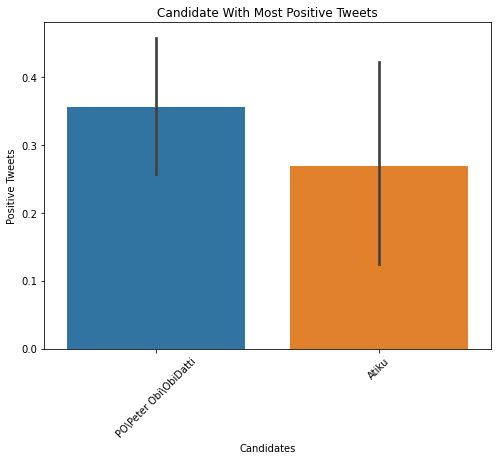

In [53]:
# plotting a barplot
fig = plt.figure(figsize =(8, 6))
plt.xticks(rotation=45)
sns.barplot(data=df1, x='search', y='Polarity').set(title='Candidate With Most Positive Tweets', 
                                                    xlabel ='Candidates', ylabel = 'Positive Tweets');

#### OBSERVATION
####### The analysis shows that Peter Obi has the most polarity (positive tweets) among the other political opponent. Followed by Atiku and then Tinubu.

In [54]:
# Read the whole text.
text = candidates_2023

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(s),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


TypeError: expected string or bytes-like object